In [1]:
#import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime
import pickle
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("energydata_complete.csv")

In [3]:
data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [4]:
data.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [3]:
columns = {'T1':'temp_kitchen','T2':'temp_living','RH_1':'humidity_living','RH_2':'humidity_laundry_1','T3':'temp_laundry','T4':'temp_office',
           'T5':'temp_bathroom','T6':'temp_outb(nth)','T7':'temp_ironing','T8':'temp_teen','T9':'temp_parent',
           'RH_3':'humidity_laundry_2','RH_4':'humidity_office','RH_5':'humidity_bathroom',
           'RH_6':'humidity_outb(nth)','RH_7':'humidity_ironing','RH_8':'humidity_teen','RH_9':'humidity_parent',
           'rv1':'random_var1','rv2':'random_var2','RH_out':'humidity_outside','T_out':'temp_outside'}

In [4]:
data.rename(columns=columns,inplace=True)

In [7]:
data

,date,Appliances,lights,temp_kitchen,humidity_living,temp_living,humidity_laundry,temp_laundry,humidity_laundry,temp_office,...,temp_parent,humidity_parent,temp_outside,Press_mm_hg,humidity_outside,Windspeed,Visibility,Tdewpoint,random_var1,random_var2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [5]:
#cast date column to datetime
data['date'] = pd.to_datetime(data['date'])

In [8]:
data

,date,Appliances,lights,temp_kitchen,humidity_living,temp_living,humidity_laundry_1,temp_laundry,humidity_laundry_2,temp_office,...,temp_parent,humidity_parent,temp_outside,Press_mm_hg,humidity_outside,Windspeed,Visibility,Tdewpoint,random_var1,random_var2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [6]:
data['day'] = data['date'].dt.day
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month

data

,date,Appliances,lights,temp_kitchen,humidity_living,temp_living,humidity_laundry_1,temp_laundry,humidity_laundry_2,temp_office,...,Press_mm_hg,humidity_outside,Windspeed,Visibility,Tdewpoint,random_var1,random_var2,day,year,month
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433,11,2016,1
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195,11,2016,1
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668,11,2016,1
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389,11,2016,1
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097,11,2016,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812,27,2016,5
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940,27,2016,5
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117,27,2016,5
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784,27,2016,5


In [17]:
data.describe()

,date,Appliances,lights,temp_kitchen,humidity_living,temp_living,humidity_laundry,temp_laundry,humidity_laundry,temp_office,...,Press_mm_hg,humidity_outside,Windspeed,Visibility,Tdewpoint,random_var1,random_var2,day,year,month
count,19735,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.0,19735.000000
mean,2016-03-20 05:30:00,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,...,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033,16.057411,2016.0,3.101647
min,2016-01-11 17:00:00,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,...,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322,1.000000,2016.0,1.000000
25%,2016-02-14 23:15:00,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,...,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889,9.000000,2016.0,2.000000
50%,2016-03-20 05:30:00,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,...,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653,16.000000,2016.0,3.000000
75%,2016-04-23 11:45:00,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,...,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769,23.000000,2016.0,4.000000
max,2016-05-27 18:00:00,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,...,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530,31.000000,2016.0,5.000000
std,NaN,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,...,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634,8.450998,0.0,1.339200


In [25]:
data['date'].unique()

<DatetimeArray>
['2016-01-11 17:00:00', '2016-01-11 17:10:00', '2016-01-11 17:20:00',
 '2016-01-11 17:30:00', '2016-01-11 17:40:00', '2016-01-11 17:50:00',
 '2016-01-11 18:00:00', '2016-01-11 18:10:00', '2016-01-11 18:20:00',
 '2016-01-11 18:30:00',
 ...
 '2016-05-27 16:30:00', '2016-05-27 16:40:00', '2016-05-27 16:50:00',
 '2016-05-27 17:00:00', '2016-05-27 17:10:00', '2016-05-27 17:20:00',
 '2016-05-27 17:30:00', '2016-05-27 17:40:00', '2016-05-27 17:50:00',
 '2016-05-27 18:00:00']
Length: 19735, dtype: datetime64[ns]

<Axes: xlabel='date'>

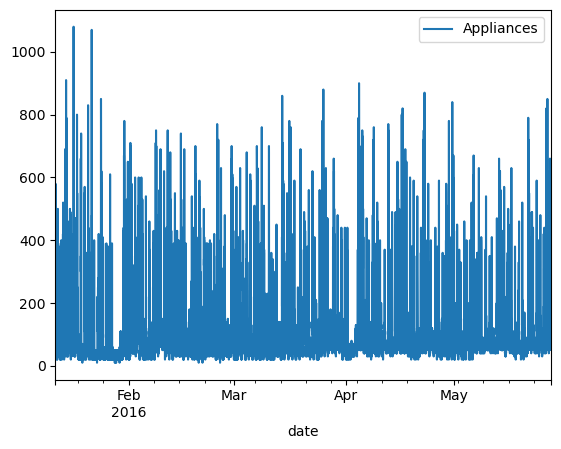

In [24]:
(data[['date','Appliances']].set_index('date')).plot()

In [42]:
data.isna().sum()

Appliances            0
lights                0
temp_kitchen          0
humidity_living       0
temp_living           0
humidity_laundry      0
temp_laundry          0
humidity_laundry      0
temp_office           0
humidity_office       0
temp_bathroom         0
humidity_bathroom     0
temp_outb(nth)        0
humidity_outb(nth)    0
temp_ironing          0
humidity_ironing      0
temp_teen             0
humidity_teen         0
temp_parent           0
humidity_parent       0
temp_outside          0
Press_mm_hg           0
humidity_outside      0
Windspeed             0
Visibility            0
Tdewpoint             0
random_var1           0
random_var2           0
day                   0
year                  0
month                 0
dtype: int64

<Axes: xlabel='Appliances', ylabel='month'>

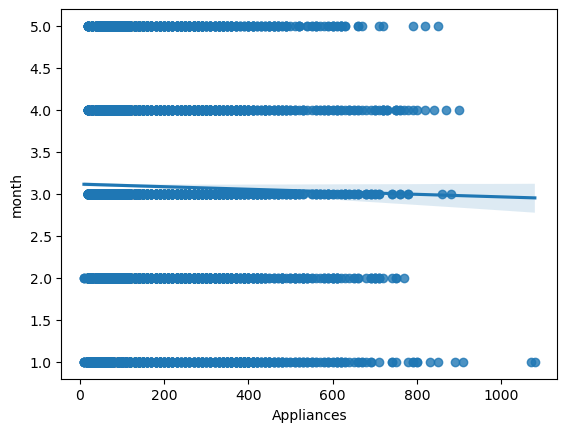

In [28]:
sns.regplot(x='Appliances',y='month',data=data)

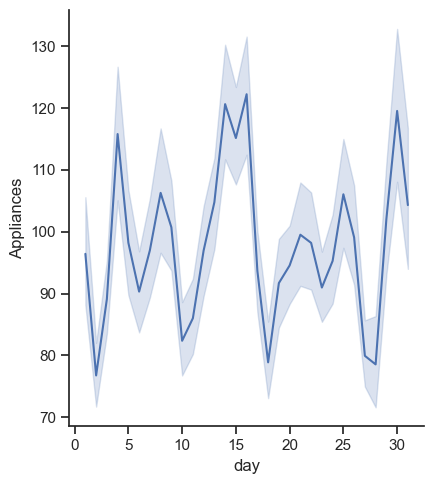

In [39]:
sns.set_theme(style="ticks")

dots = sns.load_dataset("dots")

# Define the palette as a list to specify exact values
palette = sns.color_palette("rocket_r")

# Plot the lines on two facets
sns.relplot(
    data=data,
    x="day", y="Appliances",
    kind="line", size_order=["T1", "T2"], palette=palette,
    height=5, aspect=.90, facet_kws=dict(sharex=False),
)
plt.show()

In [19]:
data.drop(columns='date',inplace=True)

## Feature Engineering

In [102]:
data.columns

Index(['Appliances', 'lights', 'temp_kitchen', 'humidity_living',
       'temp_living', 'humidity_laundry_1', 'temp_laundry',
       'humidity_laundry_2', 'temp_office', 'humidity_office', 'temp_bathroom',
       'humidity_bathroom', 'temp_outb(nth)', 'humidity_outb(nth)',
       'temp_ironing', 'humidity_ironing', 'temp_teen', 'humidity_teen',
       'temp_parent', 'humidity_parent', 'temp_outside', 'Press_mm_hg',
       'humidity_outside', 'Windspeed', 'Visibility', 'Tdewpoint',
       'random_var1', 'random_var2', 'day', 'year', 'month'],
      dtype='object')

In [7]:
data['avg_humidity'] = (data['humidity_laundry_1']+data['humidity_laundry_1']+data['humidity_office']+
                        data['humidity_living']+data['humidity_bathroom']+data['humidity_outb(nth)']+
                        data['humidity_ironing']+data['humidity_teen']+data['humidity_parent']+data['humidity_outside'])/10

data['avg_temp'] = (data['temp_office']+data['temp_kitchen']+data['temp_teen']+
                        data['temp_living']+data['temp_bathroom']+data['temp_outb(nth)']+
                        data['temp_ironing']+data['humidity_teen']+data['temp_parent']+data['temp_outside'])/10

In [11]:
data

,date,Appliances,lights,temp_kitchen,humidity_living,temp_living,humidity_laundry_1,temp_laundry,humidity_laundry_2,temp_office,...,Windspeed,Visibility,Tdewpoint,random_var1,random_var2,day,year,month,avg_humidity,avg_temp
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,7.000000,63.000000,5.300000,13.275433,13.275433,11,2016,1,55.025667,19.021667
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,6.666667,59.166667,5.200000,18.606195,18.606195,11,2016,1,54.937750,18.990333
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,6.333333,55.333333,5.100000,28.642668,28.642668,11,2016,1,54.735333,18.924000
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,6.000000,51.500000,5.000000,45.410389,45.410389,11,2016,1,54.676333,18.865333
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,5.666667,47.666667,4.900000,10.084097,10.084097,11,2016,1,54.812667,18.857000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,3.333333,23.666667,13.333333,43.096812,43.096812,27,2016,5,42.663210,26.936067
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,3.500000,24.500000,13.300000,49.282940,49.282940,27,2016,5,42.657095,26.822781
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,3.666667,25.333333,13.266667,29.199117,29.199117,27,2016,5,42.831381,26.725190
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,3.833333,26.166667,13.233333,6.322784,6.322784,27,2016,5,42.935063,26.546192


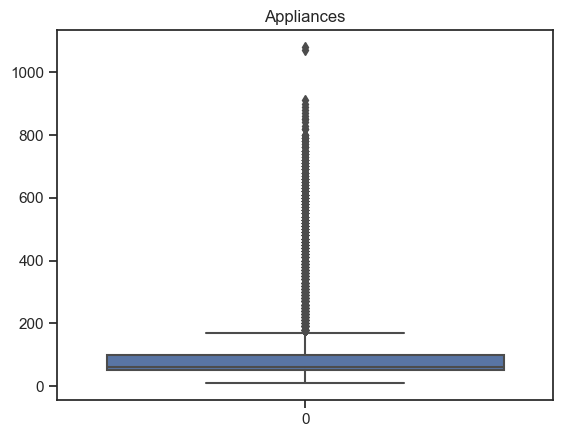

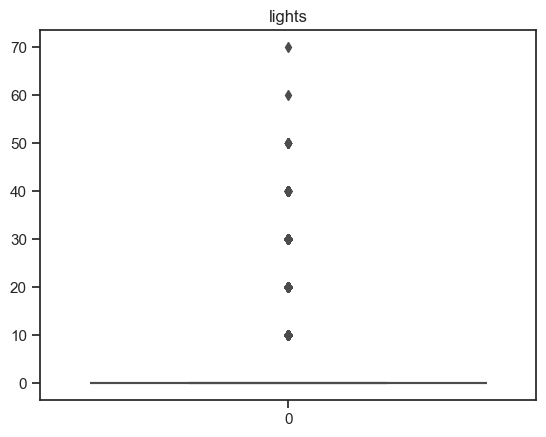

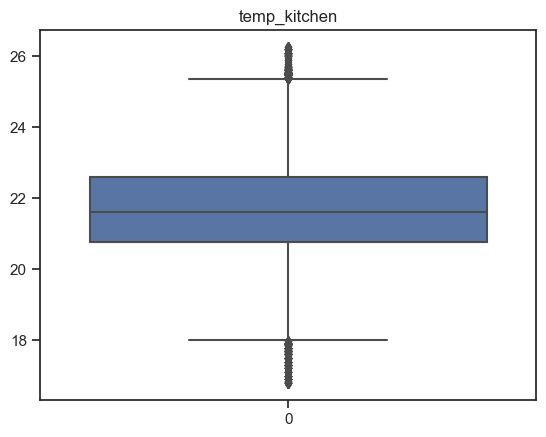

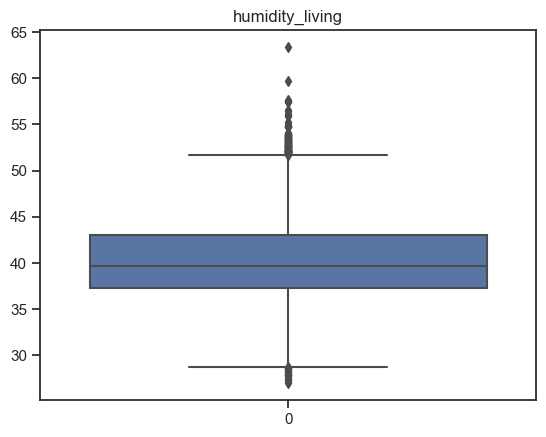

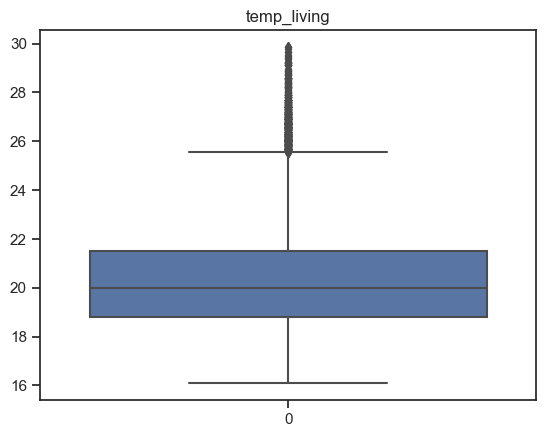

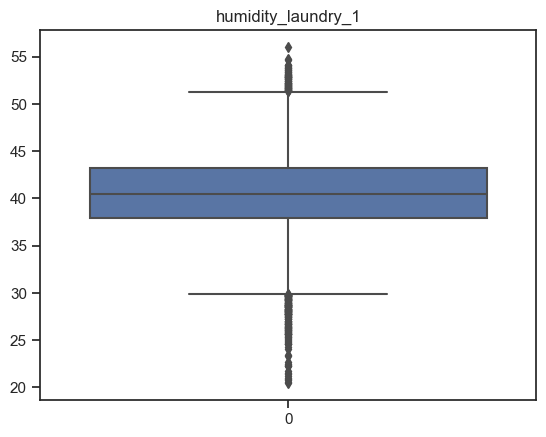

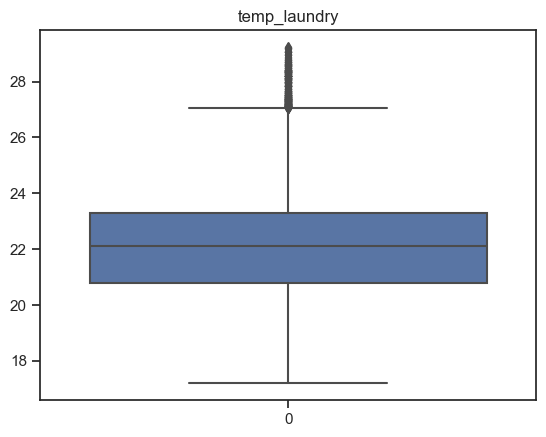

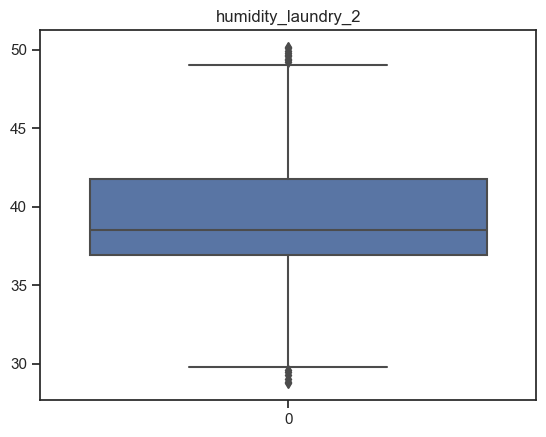

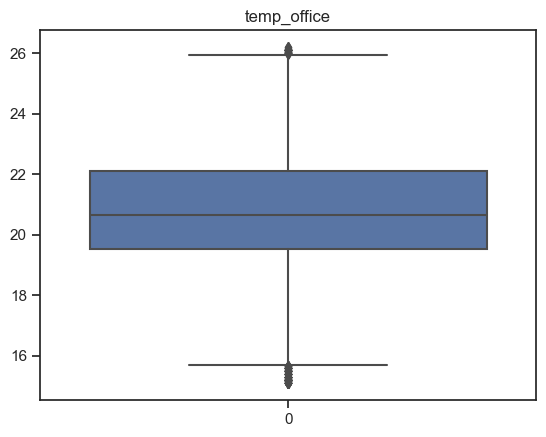

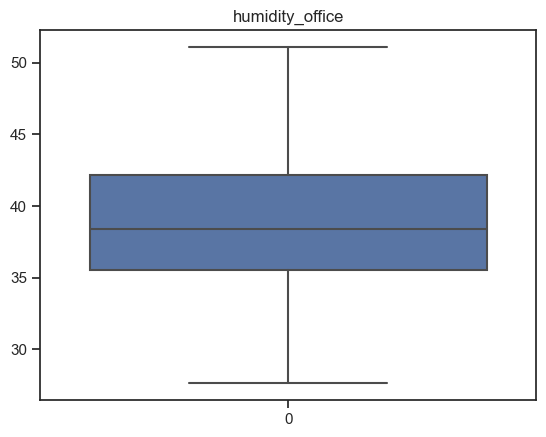

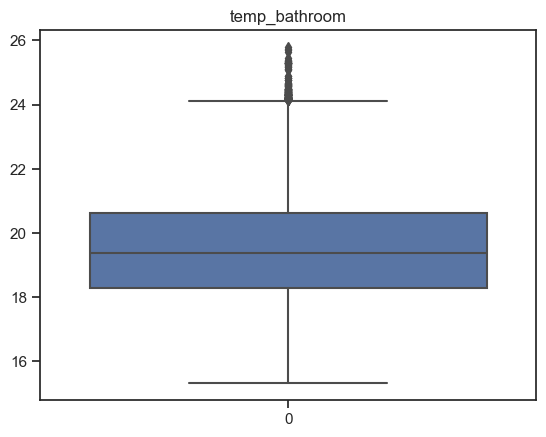

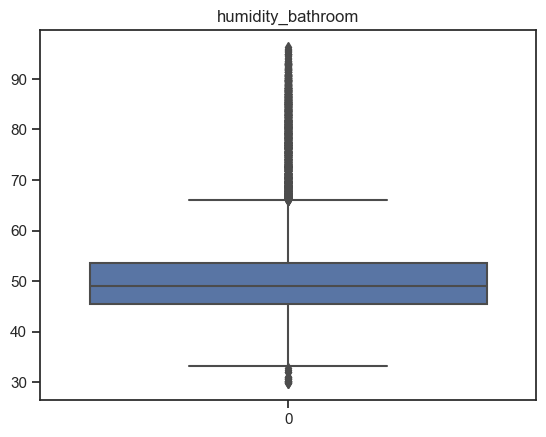

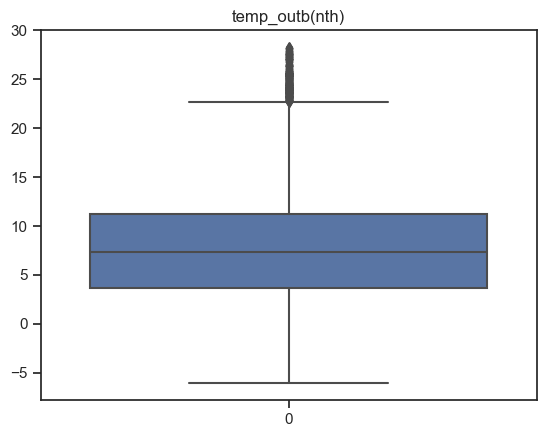

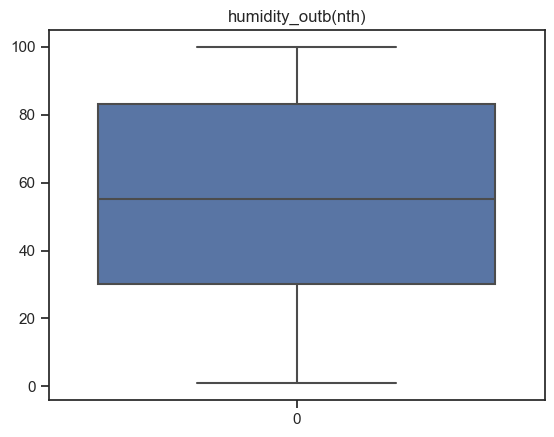

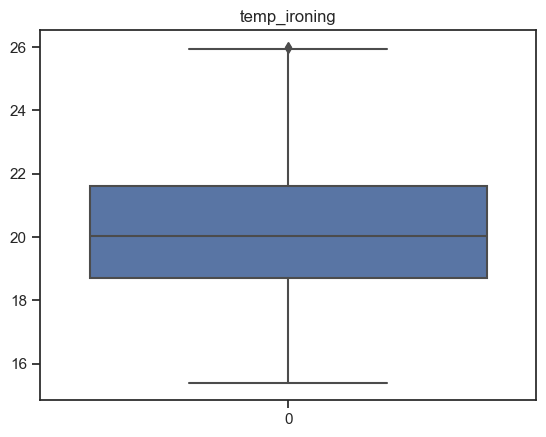

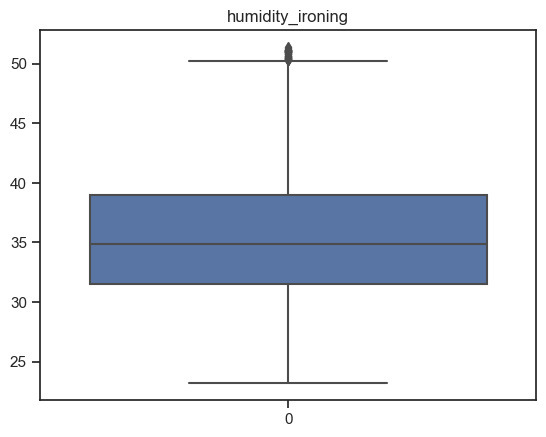

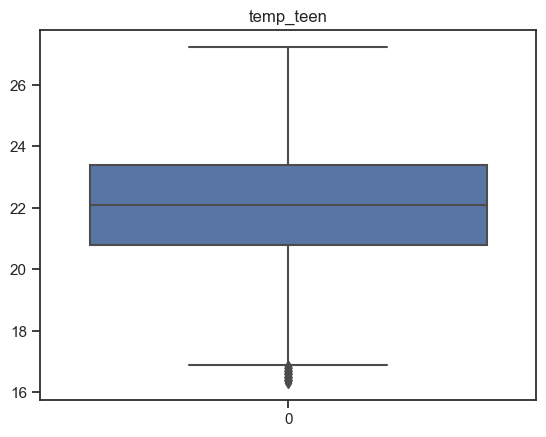

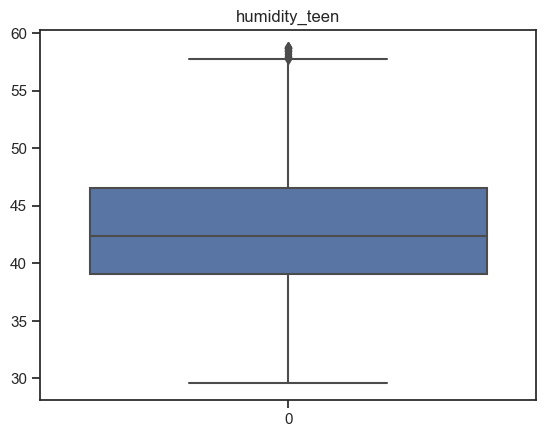

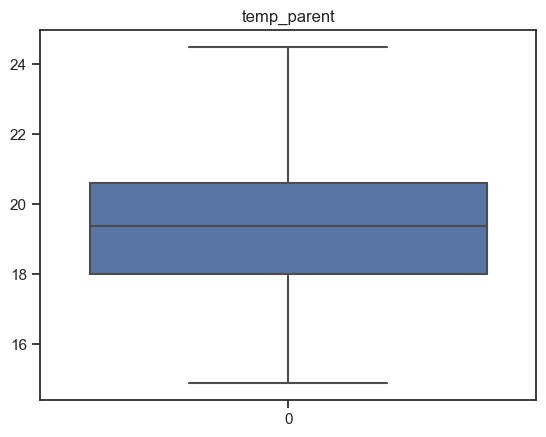

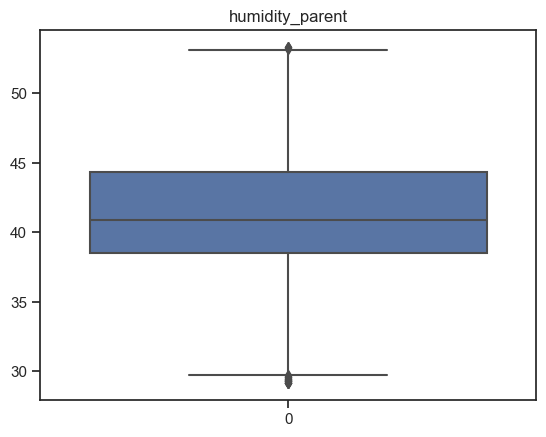

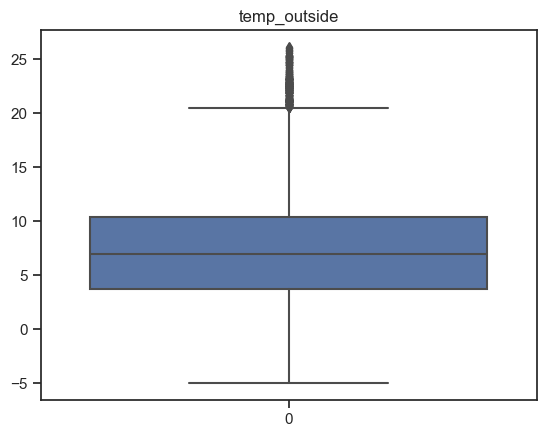

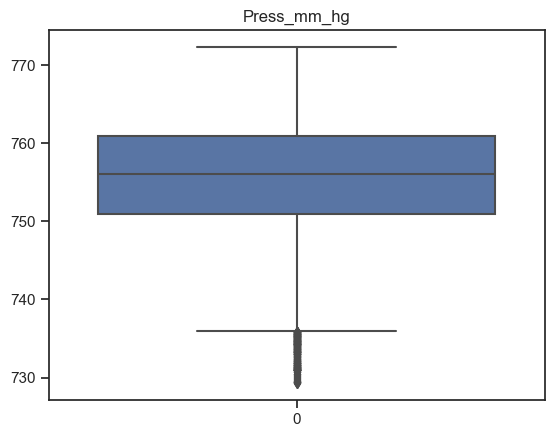

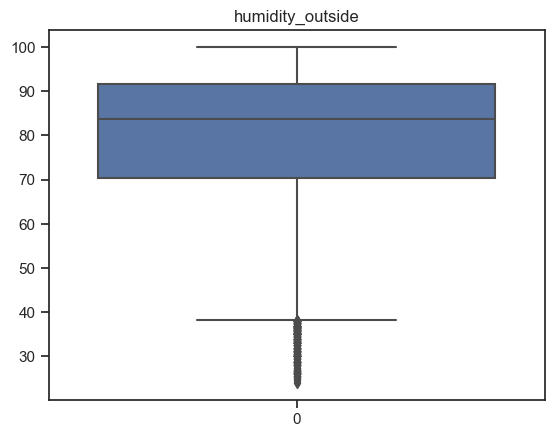

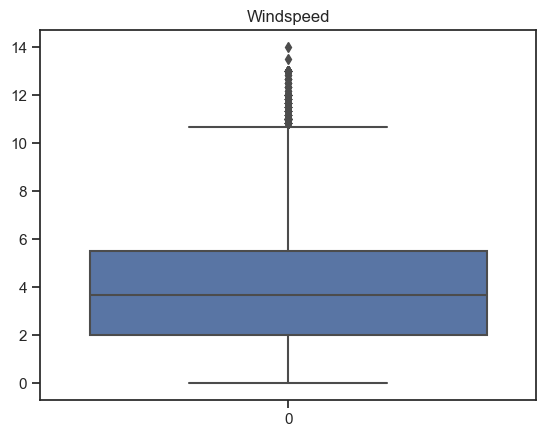

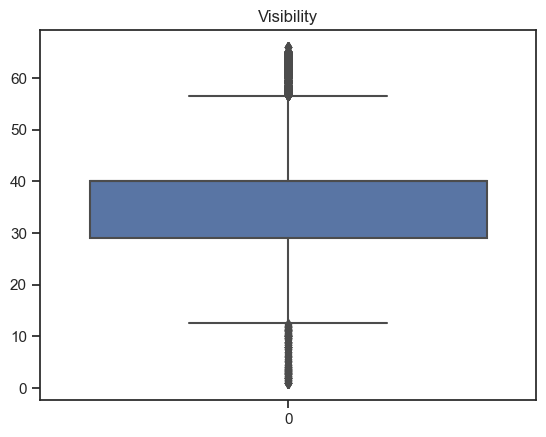

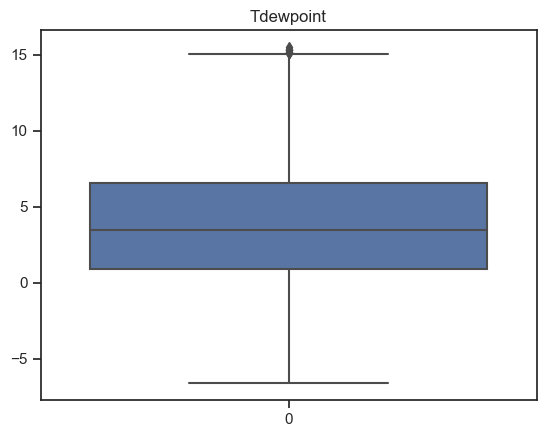

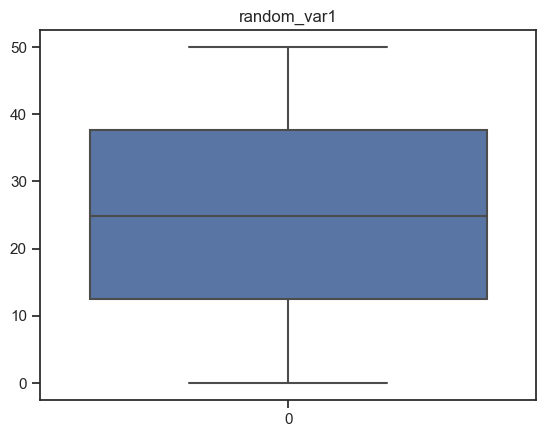

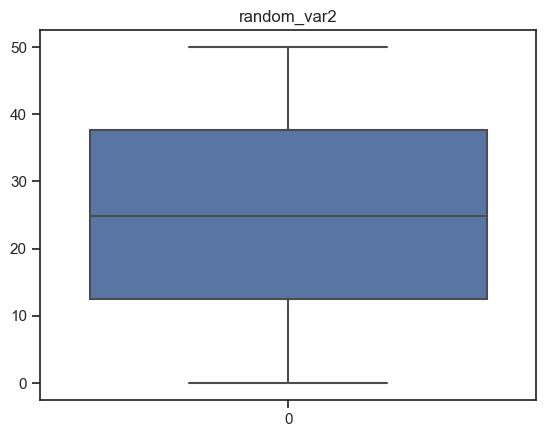

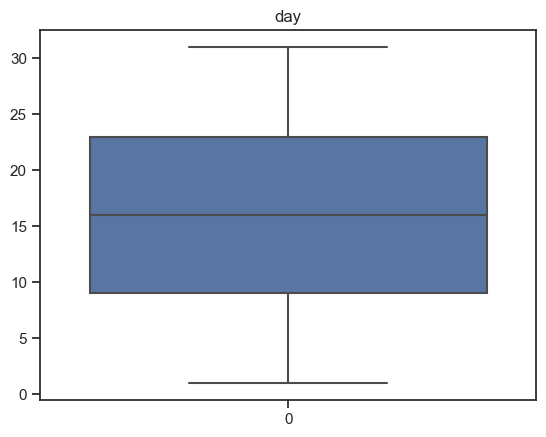

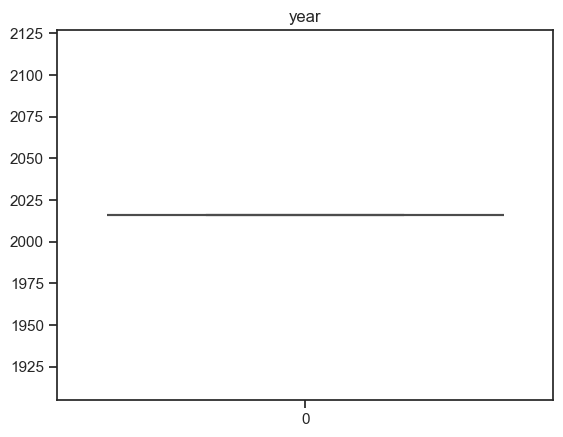

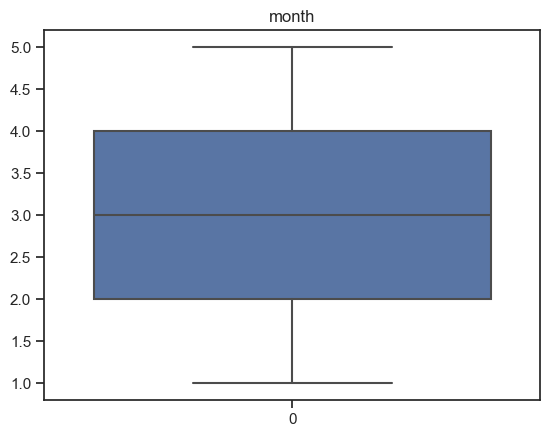

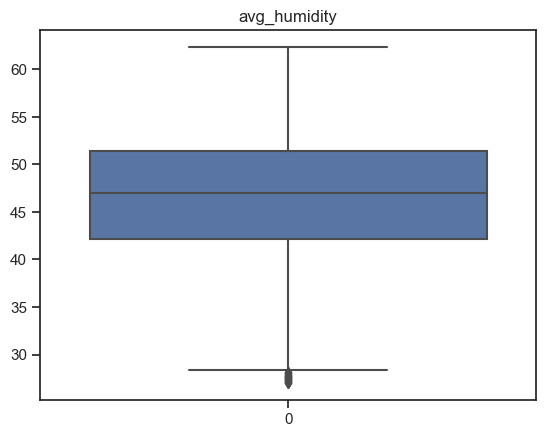

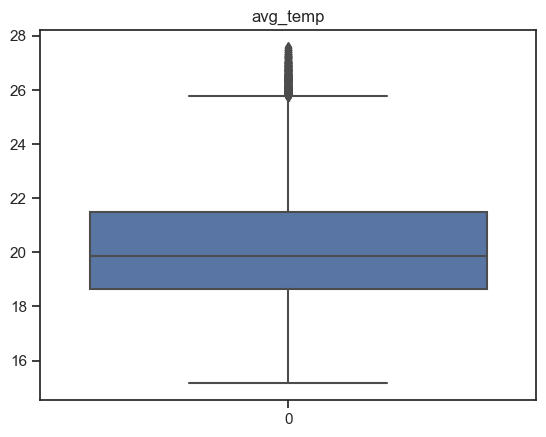

In [68]:
cols = data.columns

for col in cols:
    plt.figure()
    sns.boxplot(data[col])
    plt.title(col)
    plt.show()

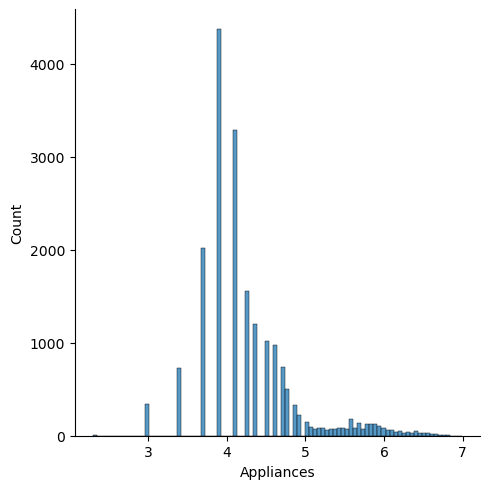

In [25]:
sns.displot(np.log(data['Appliances']))

In [108]:
data.describe()

,Appliances,lights,temp_kitchen,humidity_living,temp_living,humidity_laundry_1,temp_laundry,humidity_laundry_2,temp_office,humidity_office,...,humidity_outside,Windspeed,Visibility,Tdewpoint,random_var1,random_var2,day,month,avg_humidity,avg_temp
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033,16.057411,3.101647,46.531303,20.251604
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634,8.450998,1.339200,6.502895,2.280031
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322,1.000000,1.000000,27.007905,15.171278
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889,9.000000,2.000000,42.172458,18.630750
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653,16.000000,3.000000,46.965867,19.854000
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769,23.000000,4.000000,51.400028,21.489524
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530,31.000000,5.000000,62.347056,27.583714


In [8]:
data.drop(columns='year',inplace=True)

In [11]:
data.drop(columns='date', inplace=True)

In [12]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
scaler_1 = MinMaxScaler()
data_normalized = pd.DataFrame(scaler.fit_transform(data.drop(columns='Appliances')), columns= (data.drop(columns='Appliances')).columns)
data_predictors = data_normalized

data_normalized_1 = pd.DataFrame(scaler_1.fit_transform(data.drop(columns='Appliances')), columns= (data.drop(columns='Appliances')).columns)
data_predictors_1 = data_normalized_1

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_predictors, data['Appliances'], test_size=0.3, random_state=42)

In [14]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(x_train,np.log(y_train))
predict_y = linear_model.predict(x_test)

In [35]:
from sklearn.metrics import mean_absolute_error
cost = mean_absolute_error(y_test,np.exp(predict_y))
round(cost,2)

44.93

In [78]:
from sklearn.metrics import mean_squared_error

<Axes: xlabel='Appliances', ylabel='Density'>

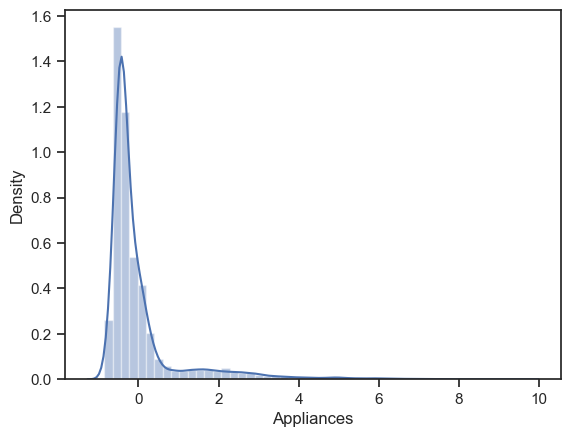

In [79]:

sns.distplot(data_normalized['Appliances'])

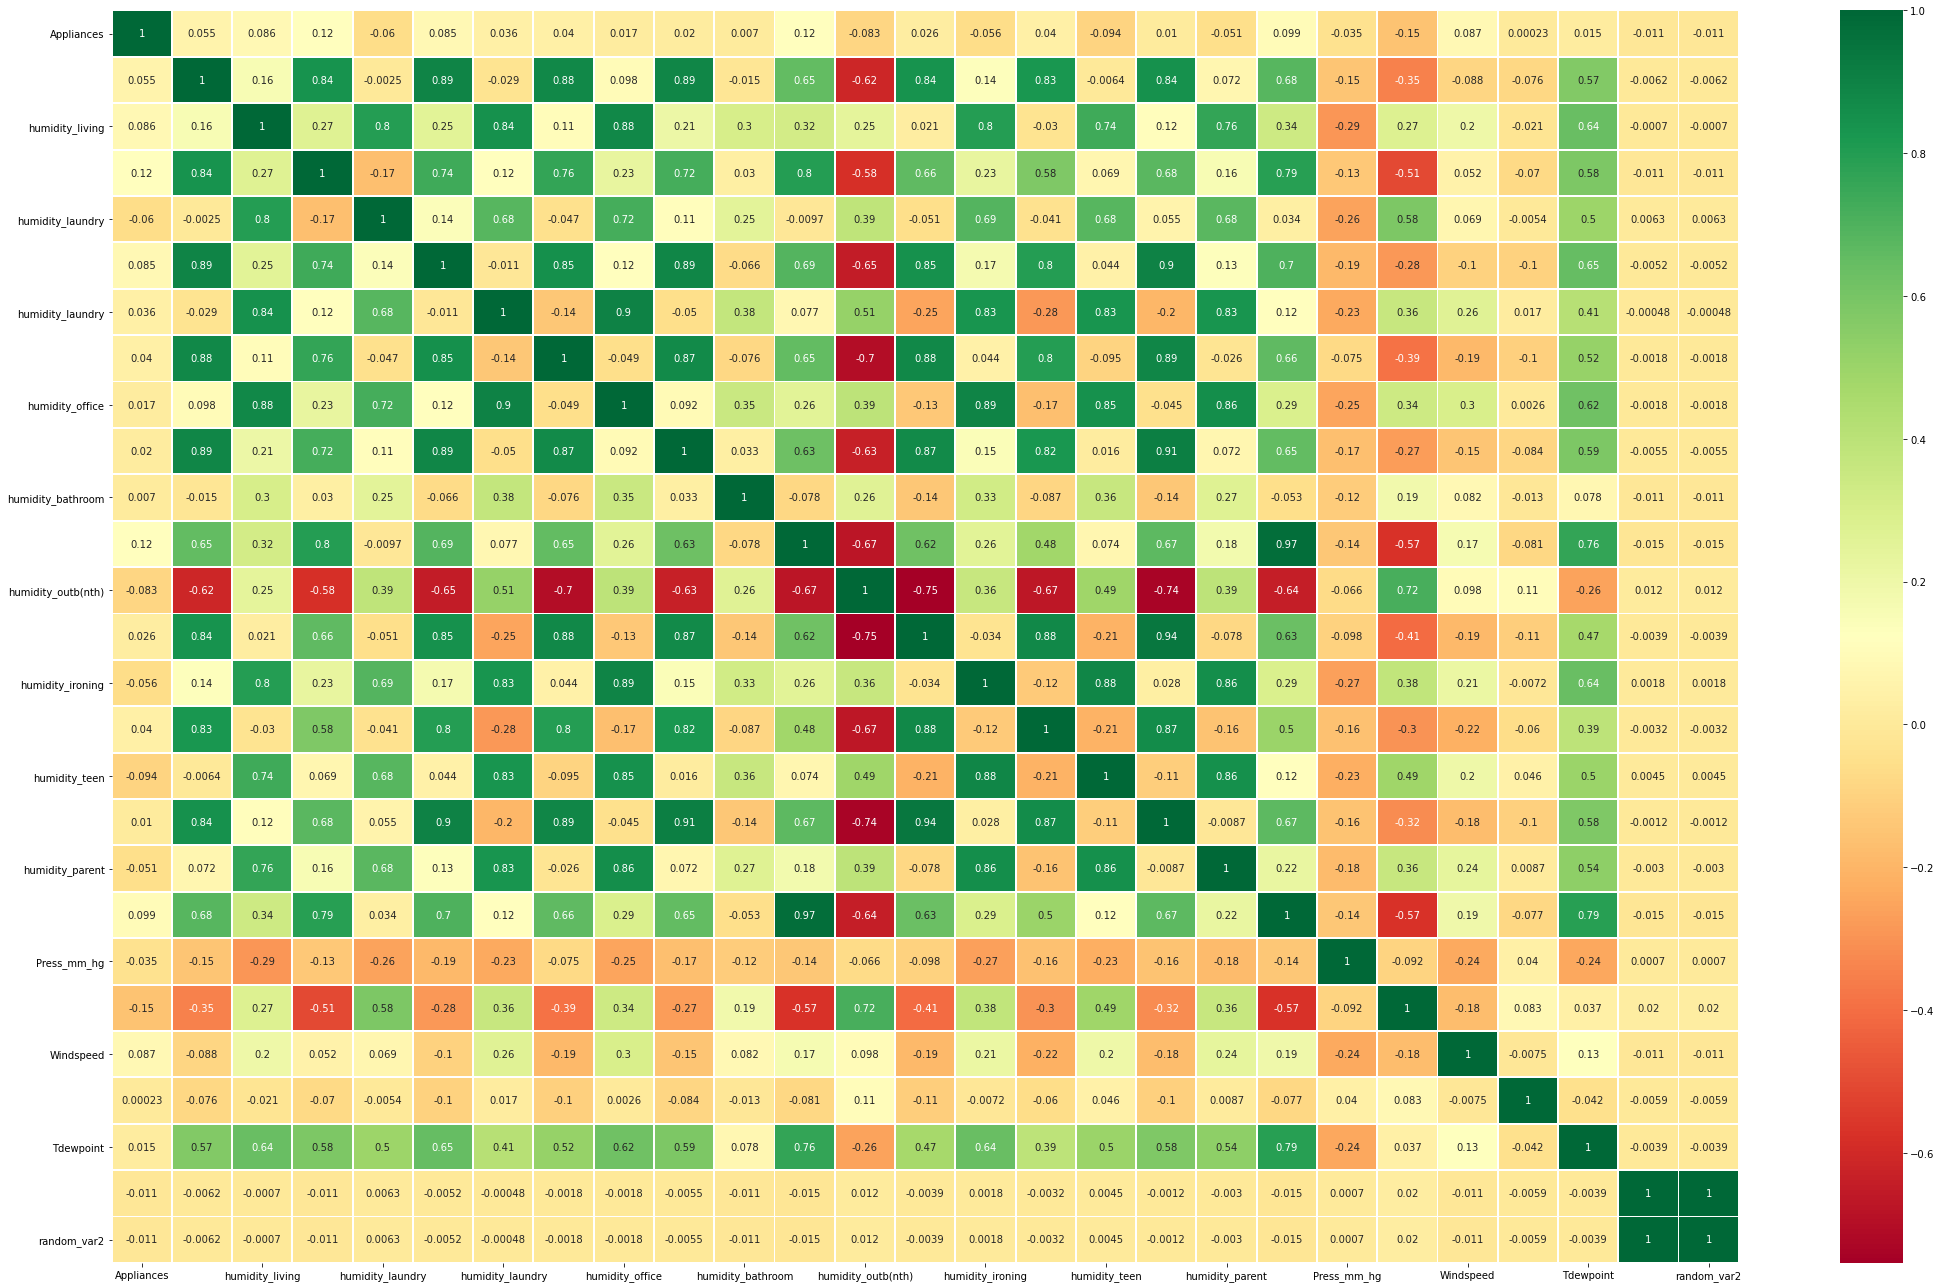

In [71]:
%matplotlib inline
fig = plt.figure(figsize=(30,18))
sns.heatmap(data_normalized.corr(),linewidth=0.9,annot=True,cmap='RdYlGn',xticklabels=2,yticklabels=2)
plt.tight_layout()

In [56]:
data.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [97]:
data.columns

Index(['Appliances', 'temp_kitchen', 'humidity_living', 'temp_living',
       'humidity_laundry', 'temp_laundry', 'humidity_laundry', 'temp_office',
       'humidity_office', 'temp_bathroom', 'humidity_bathroom',
       'temp_outb(nth)', 'humidity_outb(nth)', 'temp_ironing',
       'humidity_ironing', 'temp_teen', 'humidity_teen', 'temp_parent',
       'humidity_parent', 'temp_outside', 'Press_mm_hg', 'humidity_outside',
       'Windspeed', 'Visibility', 'Tdewpoint', 'random_var1', 'random_var2'],
      dtype='object')

In [15]:
from sklearn.model_selection import train_test_split
data_predictors = data_normalized[['avg_temp','avg_humidity']]
x_train,x_test,y_train,y_test = train_test_split(data_predictors,data['Appliances'],test_size=0.3,random_state=42)

In [16]:
x_train

,avg_temp,avg_humidity
9129,-0.930247,-0.576856
2453,-0.981563,1.017475
9152,-1.244578,-0.241932
12694,0.183100,-0.253325
16952,2.838657,-1.182678
...,...,...
11284,0.451348,-0.082012
11964,1.361739,-0.415154
5390,-1.365486,0.038378
860,-0.675902,-0.074036


In [55]:
from sklearn.feature_selection import f_regression, SelectPercentile

select = SelectPercentile(score_func=f_regression, percentile=10)

select.fit(x_train,y_train)
x_train_selected = select.transform(x_train)

In [57]:
select.feature_names_in_

array(['avg_temp', 'avg_humidity'], dtype=object)

In [17]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(x_train,np.log(y_train))
predict_y = linear_model.predict(x_test)

In [22]:
np.exp(linear_model.predict([[2,3]]))

array([64.91256048])

In [59]:
from sklearn.metrics import mean_absolute_error
cost = mean_absolute_error(y_test,np.exp(predict_y))
round(cost,2)

50.9

In [60]:
from sklearn.metrics import mean_squared_error
cost1 = np.sqrt(mean_squared_error(y_test,np.exp(predict_y)))
round(cost1,3)

103.462

In [61]:
from sklearn.metrics import r2_score
cost2 = r2_score(y_test,np.exp(predict_y))
round(cost2,2)

-0.04

In [62]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [63]:
rig = Ridge(alpha=0.4)
rigd = rig.fit(x_train,np.log(y_train))
rir = rigd.predict(x_test)

In [64]:
from sklearn.metrics import mean_squared_error
coste = np.sqrt(mean_squared_error(y_test,np.exp(rir)))
round(coste,3)

103.462

In [65]:
L = Lasso(alpha=0.001)
La = L.fit(x_train,np.log(y_train))
Las = La.predict(x_test)

In [66]:
def get_weights_df(model, feat, col_name) :
#this function returns the weight of every feature
    weights = pd.Series(model.coef_, feat.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns = [ 'Features' , col_name]
    weights_df[col_name].round( 3 )
    return weights_df
#linear_model_weights = get_weights_df(model, x_train, 'Linear_Model_Weight' )
ridge_weights_df = get_weights_df(rigd, x_train, 'Ridge_Weight' )
lasso_weights_df = get_weights_df(La, x_train, 'Lasso_weight' )
print(lasso_weights_df)
print(ridge_weights_df)
#final_weights = pd.merge(linear_model_weights, ridge_weights_df, on= 'Features' )
#final_weights = pd.merge(final_weights, lasso_weights_df, on= 'Features' )

       Features  Lasso_weight
0  avg_humidity     -0.088598
1      avg_temp      0.067509
       Features  Ridge_Weight
0  avg_humidity     -0.089395
1      avg_temp      0.068302


In [70]:
from sklearn.metrics import mean_squared_error
costL = np.sqrt(mean_squared_error(y_test,np.exp(Las)))
round(costL,3)

103.467

In [71]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha= 0.4 )
ridge_reg.fit(x_train, y_train)
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha= 0.001 )
lasso_reg.fit(x_train, y_train)
#comparing the effects of regularisation
def get_weights_df(model, feat, col_name) :
#this function returns the weight of every feature
    weights = pd.Series(model.coef_, feat.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns = [ 'Features' , col_name]
    weights_df[col_name].round( 3 )
    return weights_df
linear_model_weights = get_weights_df(linear_model, x_train, 'Linear_Model_Weight' )
ridge_weights_df = get_weights_df(ridge_reg, x_train, 'Ridge_Weight' )
lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso_weight' )
final_weights = pd.merge(linear_model_weights, ridge_weights_df, on= 'Features' )
final_weights = pd.merge(final_weights, lasso_weights_df, on= 'Features' )

In [72]:
corr_matrix = np.corrcoef(predict_y, y_test)
corr = corr_matrix[0,1]
R_sq = corr**2

print(R_sq)


0.011765502938623851


In [133]:
import statsmodels.api as sm

In [134]:
model = sm.OLS(y_train, x_train).fit()

In [135]:
print(model.ssr)

277170669.5613853


In [50]:
linear_model.feature_names_in_

array(['avg_temp', 'avg_humidity', 'day'], dtype=object)

In [74]:
with open("model.pkl", "wb") as f:
    pickle.dump(linear_model, f)